<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

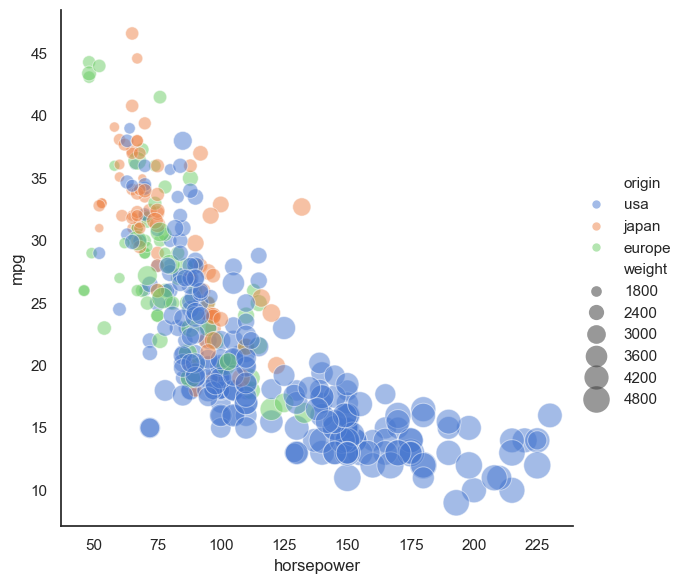

In [1]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

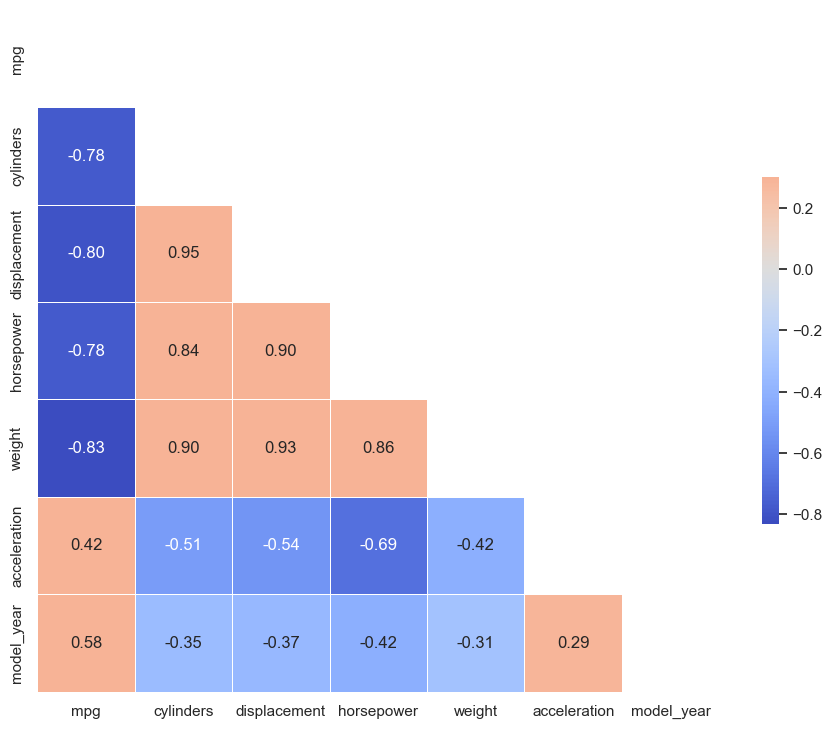

In [2]:
from string import ascii_letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert non-numeric columns to numeric where possible
mpg_numeric = mpg.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = mpg_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with annotations
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt=".2f")
plt.show()


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Time para medir el tiempo de entrenamiento
import time
start_time = time.time()

# Find the two variables with the highest absolute correlation (excluding self-correlation)
corr_unstacked = corr.abs().unstack()
corr_unstacked = corr_unstacked[corr_unstacked < 1]  # Exclude self-correlation
highest_corr = corr_unstacked.idxmax()
highest_corr_value = corr.loc[highest_corr[0], highest_corr[1]]
print(f"Highest correlation: {highest_corr[0]} and {highest_corr[1]} ({highest_corr_value:.2f})")


# Select features and target variable
X = mpg_numeric[['cylinders']]  # Using 'cylinders' as the feature
y = mpg_numeric['displacement']  # 'displacement' as Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Handle missing values in X_train and X_test
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

end_time = time.time()
print(f"Training time: {end_time - start_time:.6f} seconds")


Highest correlation: cylinders and displacement (0.95)
Training time: 0.008079 seconds


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [4]:
# Show statistics of the model's performance
# Show R-squared value
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

# Show Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Show Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.8960527226600404
Mean Squared Error: 1235.1586553888878
Root Mean Squared Error: 35.14482401988788


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


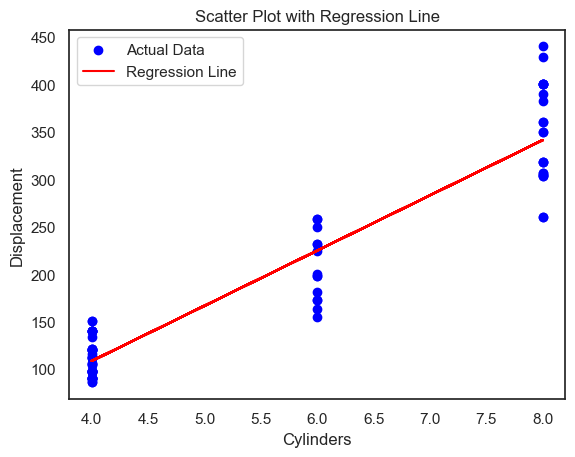

In [5]:
# Scatter plot of the actual data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Cylinders')
plt.ylabel('Displacement')
plt.title('Scatter Plot with Regression Line')
plt.legend()

# Show the plot
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.